In [1]:
%load_ext autoreload

%autoreload 2

loading LFM DE ItemKNN: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


Loading DEEZER FR dataset
Loading DEEZER BR dataset
Loading DEEZER DE dataset
Loading LFM FR dataset
Loading LFM BR dataset
Loading LFM DE dataset


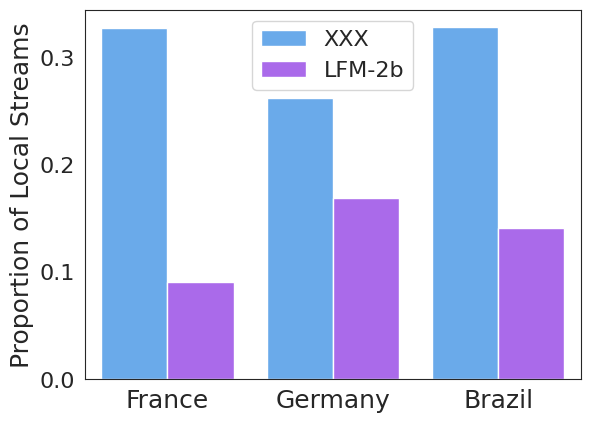

processing LFM DE ItemKNN: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


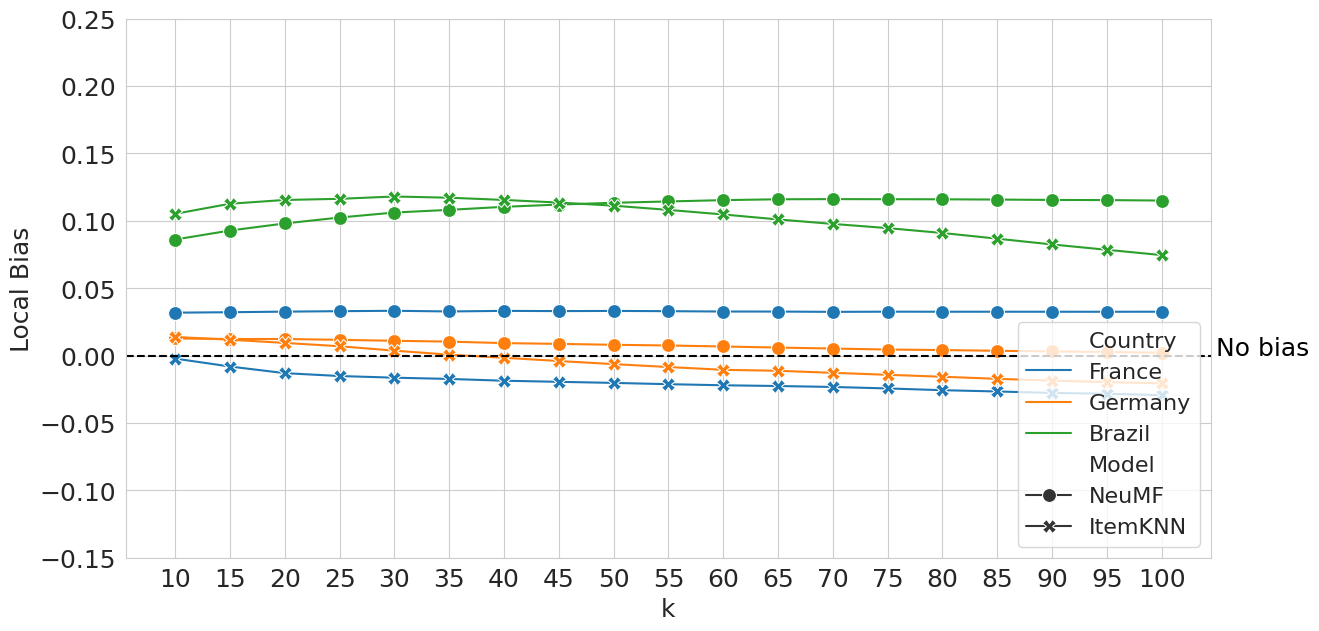

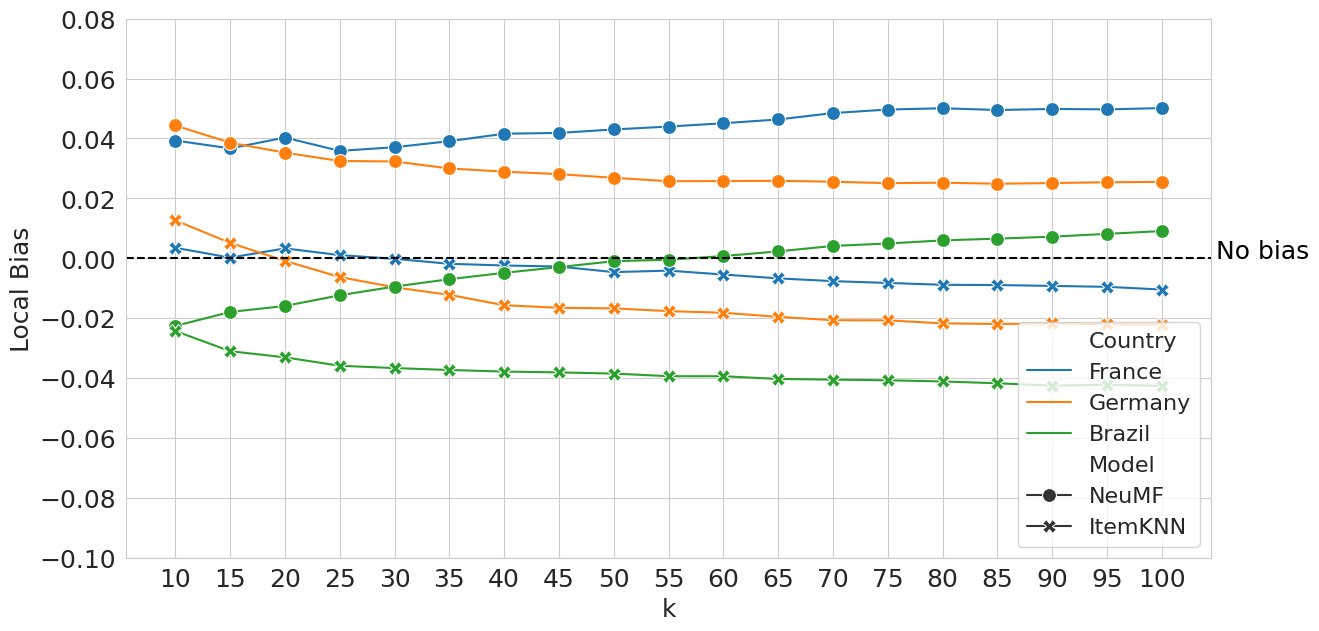

In [2]:
# Generates all figures

from helpers_figures import MetadataProcesor, MakePlots

N_MODELS = 1 # Number of models with same parameters to take into account ('max' to take all of them)
K_VALUES = range(10, 101, 5) # k values i top-k recommendation
LFM_metadata_file_name = "metadata_LFM"
DEEZER_metadata_file_name_list = [
    "metadata_DEEZER_musicbrainz",
    "metadata_DEEZER_active",
    "metadata_DEEZER_origin",
]

for is_global_model in [False]:
    for DEEZER_metadata_file_name in DEEZER_metadata_file_name_list[:1]:

        metadata = MetadataProcesor(LFM_metadata_file_name, DEEZER_metadata_file_name)
        metadata.process()

        plots_maker = MakePlots(
            metadata=metadata.metadata,
            k_values=K_VALUES,
            matadata_filename=DEEZER_metadata_file_name,
            global_models=is_global_model,
        )

        plots_maker.load_predictions(n_tries=N_MODELS)
        plots_maker.load_datasets()

        plots_maker.plot_dataset_local_streams_percents(save=True)
        plots_maker.plot_local_listening_distribution_hist(save=True)

        plots_maker.compute_reco_results()
        plots_maker.plot_bias_topk_k_reco(save=True)


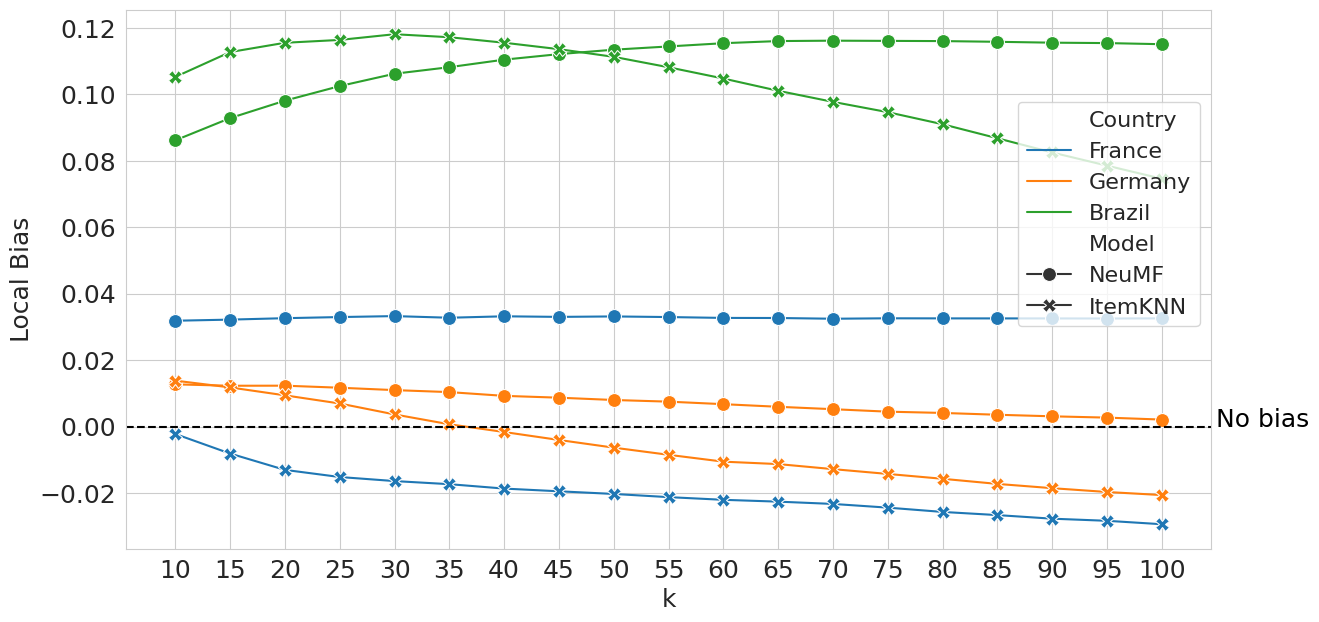

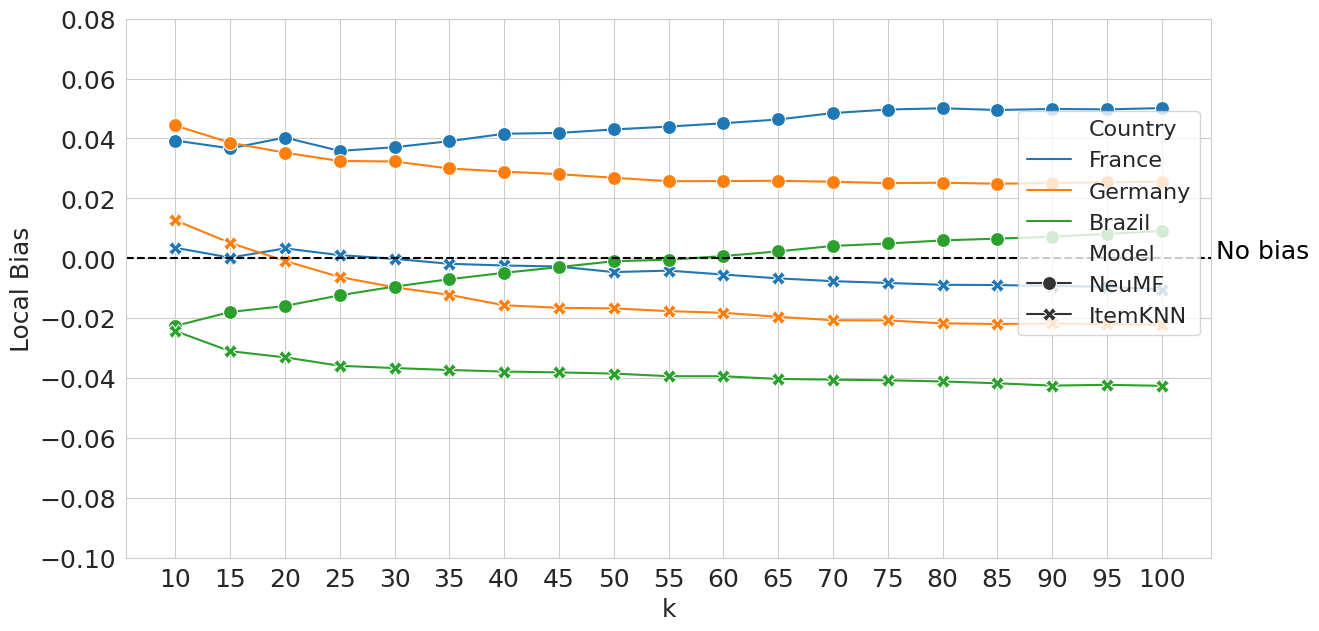

In [4]:
plots_maker.plot_bias_topk_k_reco(save=True)